In [4]:
import numpy as np

In [5]:
from matplotlib import pyplot as plt

In [6]:
import time

In [12]:
class perceptron:
    
    def __init__(self,d,gamma,bias,R,n):
        
        self.d = d
        self.gamma = gamma
        self.bias = bias
        self.R = R
        self.n = n
        
        
        weights = 2 * np.random.rand(d) - 1
        mod = np.linalg.norm(weights)
        self.weights = weights/mod
        
        
        p_label = np.zeros((d))
        n_label = np.zeros((d))
        
        
        while len(p_label) <= n/2 or len(n_label) <= n/2:
            
            data = np.random.uniform(-R,R,d)
            
            if(np.linalg.norm(data) <= R):                

                if(np.dot(self.weights,data.T) >= self.gamma):
                    if(len(p_label) <= n/2):
                        p_label = np.vstack([p_label,data])

                elif(np.dot(self.weights,data.T) <= -self.gamma):
                    if(len(n_label <= n/2)):
                        n_label = np.vstack([n_label,data])

                        
        
        labels = np.ones((len(p_label),1))
        p_label = np.hstack([p_label,labels])
        
        
        labels = np.full((len(n_label),1),-1)
        n_label = np.hstack([n_label,labels])
        
        

        self.dataset = np.vstack([p_label[1:],n_label[1:]])
        
        #     Plotting Lines
        
        
        self.findHyperplanes()




            
    def check(self):

        for pts in self.dataset:

            label = pts[-1]
            point = pts[:self.d]
            
            if(label * np.dot(self.weights,point.T) <= 0):
                return True

        return False

    
    def train(self):
        iterations = 0
    
        self.weights = np.zeros((self.d))

        while(self.check()):

            ind = np.random.randint(len(self.dataset))

            point = self.dataset[ind]
            label = point[-1]
            point = point[:self.d]

            if(label * np.dot(self.weights,point.T) <= 0):
                self.weights += label * point
                print(self.weights)
                iterations += 1
        
        self.findHyperplanes()

        return iterations


    def findHyperplanes(self):
        
        
        if(self.d == 1):
            self.weights /= np.linalg.norm(self.weights)
    
            self.sepline_p = np.array([[self.weights*(self.bias - self.gamma),0]])
            self.sepline_n = np.array([[self.weights*(self.bias + self.gamma),0]])
            self.classifier = np.array([[self.bias*self.weights,0]])
        
        
        if(self.d == 2):
        
        #     Plotting Lines
            self.weights /= np.linalg.norm(self.weights)
            per_p = (self.gamma - self.bias) * self.weights
            per_n = - per_p

            xs = np.random.uniform(-self.R,self.R,100)
            mat = np.array([-self.weights[1],self.weights[0]])

            p_set = np.array([[0,0]])
            n_set = np.array([[0,0]])
            actual = np.array([[0,0]])


            for t in xs:

                p = t * mat + per_p
                n = t * mat + per_n
                a = t * mat

                p_set = np.vstack([p_set,p])
                n_set = np.vstack([n_set,n])
                actual = np.vstack([actual,a])

            self.sepline_p = p_set[1:]
            self.sepline_n = n_set[1:]
            self.classifier = actual[1:]
            
    def plotpoints(self):
        print(self.weights)
        
#         Plotting the dataset
        data1 = brain.dataset[np.where(1 == brain.dataset[:,brain.d])[0]]
        data2 = brain.dataset[np.where(-1 == brain.dataset[:,brain.d])[0]]
        
        
        if self.d == 2:
        
            plt.plot(data1[:,0],data1[:,1],'or')
            plt.plot(data2[:,0],data2[:,1],'og')
                    
#         Plotting the separation lines
            plt.plot(self.sepline_p[:,0],self.sepline_p[:,1])
            plt.plot(self.sepline_n[:,0],self.sepline_n[:,1])
            plt.plot(self.classifier[:,0],self.classifier[:,1])
          
        
        if self.d == 1:
            plt.plot(data1[:,0],np.zeros((len(data1))),'or')
            plt.plot(data2[:,0],np.zeros((len(data2))),'og')
        
#         Plotting the separation lines
            plt.plot(self.sepline_p[:,0],self.sepline_p[:,1],'y*')
            plt.plot(self.sepline_n[:,0],self.sepline_n[:,1],'y*')
            plt.plot(self.classifier[:,0],self.classifier[:,1],'y*')
            
            
            
         

       


            
    

In [13]:
brain = perceptron(d = 1,bias = 0 ,gamma = 0.1,R = 10, n = 1000)

[-1.]


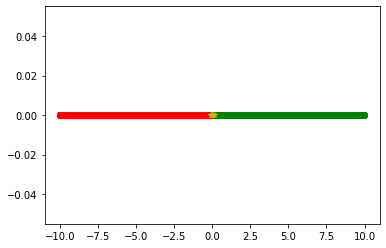

In [14]:
brain.plotpoints()

In [15]:
k = time.time()
brain.train()
t = time.time()
print(t-k)

[-3.93149001]
0.0029921531677246094


[-1.]


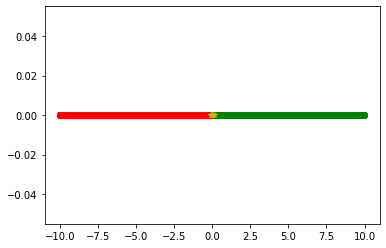

In [16]:
brain.plotpoints()